# **Introduction to Image Processing**

Image processing is a very useful tool for scientists in the lab, and for everyday uses as well. For, example, an astronomer may use image processing to help find and recognize stars, or a self driving car may use it to stay in the correct lane.

This lecture will teach you some of the fundamental tools of image processing so that you can use it in your own studies/applications.

# **Fundamentals**


# What is an image, *really*?

![alt text](https://snipboard.io/xf3naG.jpg)

*Figure 1:* Felix the cat

As we can see from Felix the cat, images are just a coordinate system in which each block (x,y) has a value associated to it. These values are later interpreted as a color.

For example, in Figure 1, we would be describing two colors (black and white) and we could describe them using 1's and 0's. In general, 0 is taken to mean the absence of color, which means that 0 = black and 1 = white. Putting these ideas together, we can see that each point in an image requires three peices of information:


1.   x - position
2.   y - position
3.   color (1 or 0)

So if we were instructing a computer to produce even a small image, we would need to give it a large list of numbers.

---
![alt text](https://i.imgur.com/fU7Yfre.png)

*Figure 2:* Checker board pattern

For example, suppose we wanted the computer to produce the checkboard patter that we see in Figure 2. If we make a list of the information the computer needs, we can format it like (x-coordinate, y-coordinate, color) and the whole list would be

(1,1,1), (1,2,0), (1,3,1), (2,1,0), (2,2,1), (2,3,0), (3,1,1), (3,2,0), (3,3,1)

---
![alt text](https://i.imgur.com/ZraCTP1.png)

*Figure 3:* Images

To make the image making process easier, people decided to ditch the traditional coordinate system and use matricies instead! However, because both systems *work* and because sometimes one method can be more convenient than the other, both still exists, but they have different names. 

When you use a coordinate system to instruct the computer, that's a **scatter plot**. When you use a matrix, that's called an **image**.

To instruct the computer to make a scatter plot of the 9 square checkerboard, we had to give it 3x9=27 numbers. To insturct it to make an image of the checkerboard, we only have to give it 9 numbers, but they have to be in the correct *order*. Specifically, the order looks like this:



```
image = [ [1, 0, 1],
          [0, 1, 0],
          [1, 0, 1] ]
```

Each location that we assign a value to is considered a pixel. Thus, we have created an image that is 3 pixels wide and 3 pixels tall, and it has a total  of 9 pixels.

When we watch youtube videos at 1080p, we are actually looking at pictures that are 1080 pixels tall and 1920 pixel wide. These images have a total of 1080x1920 = 2,073,600‬ pixels. If we round to the nearest million, there are approximately 2 million pixels in each image. This would be considered a 2 Mega Pixel (MP) image. This is the same number phone manufactures using when talking about how many megapixels their newest device has.





---




# Exercise 1: Making images
![alt text](https://imgur.com/uBM3KC6.png)

Can you make the image matrix for the checker board that is shown above?




In [1]:
# set exercise1 equal to your matrix
#SOLUTION:
exercise1 = [[0,1,0],[1,0,1],[0,1,0]]

We can check if we got this right by having the computer make the image. To do this, we will use matplotlib's "plt.imshow" function, which takes in *matricies* and turns them into images.

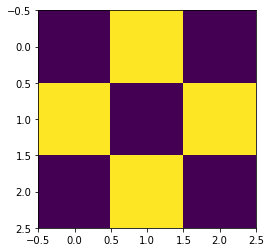

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(exercise1)

Now, we have gotten a figure that *looks* like the correct board, but the colors are wrong. To fix this, we need to tell the computer that we want to see the image in grayscale. We do this by inserting a "cmap" into the plt.imshow function. "cmap" stands for "color map" and in this case, we will set it to grayscale

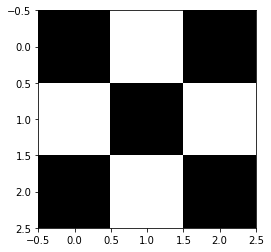

In [3]:
from matplotlib import cm
plt.imshow(exercise1, cmap=cm.gray)

If the output of the code above does not match the chekerboad in the exercise try again or ask for help. Notice how the order of the numbers is important to final image.

# Exercise 2: Making scatter plots

Now we will use a scatter plot to create the checkerboard. This time we will use matplotlib's "plt.scatter" function to create the figure. 

In the code below, we have given you a list a coordinates and values for the blocks at those coordinates. Correct the list so that it reproduces the checkerboard from Exercise 1.

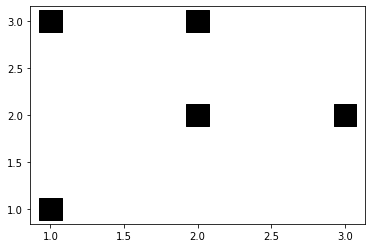

In [4]:
#SOLUTION
exercise2 = [[1,1,0], [1,2,1], [1,3,0], [2,1,1], [2,2,0], [2,3,1], [3,1,0], [3,2,1], [3,3,0]]
exercise2 = np.array(exercise2)

x_coordinates = exercise2[::,0]
y_coordinates = exercise2[::,1]
values = exercise2[::,2]

plt.scatter(x_coordinates, y_coordinates, c=values, marker='s',s = 500, cmap=cm.gray)

Recall that the order of the numbers doesn't matter for scatter plots. To see this, go back to the previous code block, and swith the order of the exercise2 list. Even though you change the order, the image produced doesn't change.

# Image Arithmatic (Introduction)

Now that we have covered the fundamentals, we can start diving into image manipulations, starting with slices and arithmatic. 

There are many tools we can use to learn about image processing. Today, we will be using Scikit-Image, a free to use and easy to learn python library, and we'll start by looking at an image of an insect.

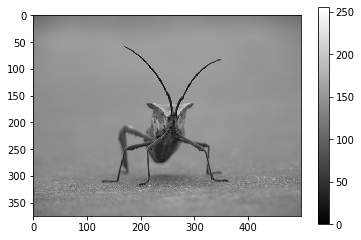

In [6]:
# first we import the input/output module from skimage called "io". io lets us 
# read files on the computer or online
from skimage import io
insect = io.imread('https://matplotlib.org/3.1.1/_images/stinkbug.png')

#we can take a look at the image we just imported once again using image show.
plt.imshow(insect, cmap=cm.gray, vmin=0, vmax=256)
plt.colorbar()

Remember that, since we are working with images, the information is stored inside of a matrix. Lets take a look at that matrix.

In [7]:
# show the array
print(insect)

[[104 104 104 ... 109 109 109]
 [105 105 105 ... 109 109 109]
 [107 106 106 ... 110 110 110]
 ...
 [112 111 110 ... 116 115 115]
 [113 113 112 ... 115 114 114]
 [113 115 115 ... 114 114 113]]


The first thing we notice is that this image is no longer just 1's and 0's. The numbers go from 0 to 256, and recalling that 0 = absence of light, we take 0=black and 256=white. All of the numbers between 0 and 255 are various shades of gray. 

Next, we can see that there are ellipses inside of the matrix. This is python's way of telling us that there are *so* many positions and values that writing them all out would take a huge amount of space on the screen, and a list that big is hard to read.

In the checker board example we had an image that had 3 rows and 3 columns. We can check the shape of any matrix by adding ".shape" after its name. Let's see the shape of the insect image

In [8]:
# show the shape of the array
print(insect.shape)

(375, 500)


It looks like this matrix has 375 rows and 500 columns, so we expect it to be wider than it is tall. We can take a look at the value of a specific pixel by calling its location like this:

In [9]:
# show the value of the pixel in the 100th row and 200th column
print(insect[100,200])

157


**Cropping**

Cropping an image is very simple. Basically, we have a really big matrix, but want to get rid of the rows and columns that we are not interestesd in. We can do this by slicing the matrix usng brackets [ ] as show below:

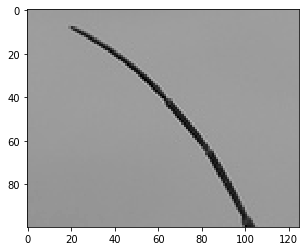

In [10]:
# display only the section of the image between columns 150 - 350 and rows 200 - 400
plt.imshow(insect[50:150,150:275], cmap=cm.gray, vmin=0, vmax=256)

In this case we cropped to the left most antenna.

# Exercise 3: Cropping

By altering the slice locations of the image matrix, can you crop the photo to focus in on the insect's face?

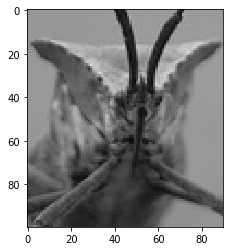

In [11]:
plt.imshow(insect[150:250,210:300], cmap=cm.gray, vmin=0, vmax=256)

# Image Arithmatic (continued)

since we are still working with a matrix, we are free to do normal math operations on it. For example, we can divide all of the values in the image by 2. This should darken the image, lets try it:

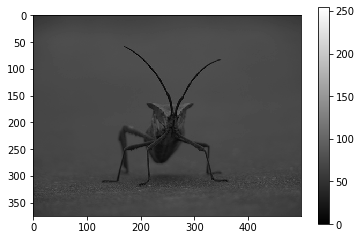

In [12]:
#divide the image by two and display it
plt.imshow(insect/2, cmap=cm.gray, vmax=255, vmin=0)
plt.colorbar()

To brighten the image, we can instead multiply the matrix by 1.5:

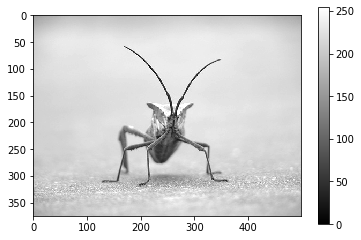

In [13]:
#multiply the image by 1.5 and display it
plt.imshow(insect*1.5, cmap=cm.gray, vmax=255, vmin=0)
plt.colorbar()

We can also add and subtract images from one another. For example, we can subtract an image from its self:

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


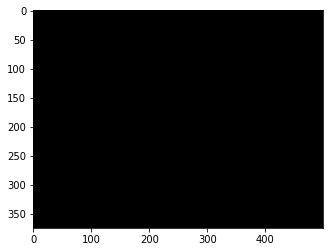

In [14]:
# subtract the image to itself and display
plt.imshow(insect-insect, cmap=cm.gray, vmax=256, vmin=0)
# check that the array in full of zeros
print(insect-insect)


We can also directly modify the values of the matrix elements ourselves. For example, if we want to set a portion of the image to solid black, we can do so by setting all of the pixels in that region to zero, like this:

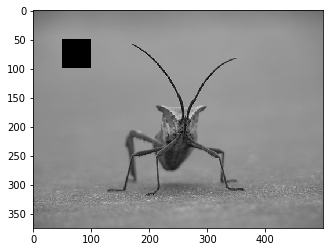

In [15]:
# set the region x=[50,100] and y=[50,100] to zero and display
img = np.copy(insect)
img[50:100,50:100] = 0
plt.imshow(img, cmap=cm.gray, vmax=256, vmin=0)

# Exercise 4: Censorship

By altering the code below, censor the insects face with a white block. Remember that white = 255

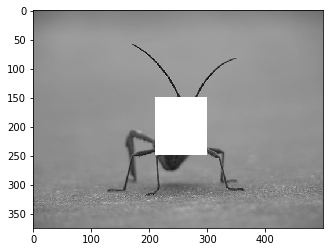

In [16]:
img = np.copy(insect)
img[150:250,210:300] = 255
plt.imshow(img, cmap=cm.gray, vmax=256, vmin=0)


# Challenge Problem : Gradients

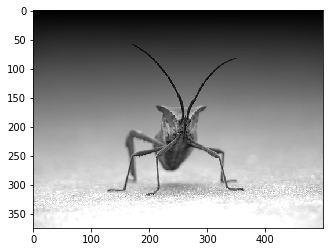

In [17]:
# challenge problem: make a fading image from top to bottom (hint: multiply the image by a gradient you can create)
plt.imshow(insect * np.linspace(0,2,len(insect))[:, None],cmap=cm.gray, vmax=256, vmin=0 )




> # **Advanced Image Processing**



# Blob Detection
## What are blobs and why do we care?
In essence, "blob detection" is the process of searching for and identifying bright spots on a dark background, or dark spots on a light background. The "blobs" can correspond to any number of physical phenomena. In astronomy, for example, this can be relevant if you have an image of a part of the sky and want to identify something like galaxies. You might be wondering though, why not just look at an image yourself and pick out blobs "by eye"? In our example of identifying galaxies in an astronomical image, a systematic way of doing this may be beneficial for several reasons: 
- you may have faint objects in your image the are difficult to distinguish from the background
- you may have a crowded field where bright points are close enough together that they are difficult to disentangle
- you may have a large dataset where it would just take you a long time to go through everything by hand
- you may want to define where a blob "ends" in a systematic way so that your blob definition is consistent across all objects you identify

These are just some of the reasons why a systematic approach to identifying blobs in images could be beneficial. Checking the output of your algorithm by eye, however, is wise to make sure that it is not outputting nonsense.

Let's get started with first reading in our first astronomical image; a nearby group of galaxies! Astronomical images are stored as "fits" files, this is essentially a table that contains the information of how bright the sky is at each pixel in your image, and a "header", which contains information about how pixels translate into coordinates on the sky, what instrument was used, and the units of the image for example. We will read the fits file into a numpy array using the package called astropy (see http://docs.astropy.org/en/stable/index.html for documentation). This package streamlines the process of working with astronomical images in Python. 

First we will import a few packages that we are going to use throughout this section: skimage will allow us to run the blob detection algorithms, matplotlib  will allow us to plot our data, astropy will allow us to read "fits" files,  and numpy will let us do cool things with arrays.

In [18]:
from skimage.feature import blob_dog, blob_log, blob_doh
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np



This line reads the fits file --> data table and header.

In [19]:
hdu = fits.open('./RSCG1.fits')

# Exercise 5: hdu

What is the type of hdu? What happens when you print hdu?

In [20]:
#Insert your code here:

print(type(hdu))
print(hdu)

<class 'astropy.io.fits.hdu.hdulist.HDUList'>


This line reads the data associated with the header into a numpy array. A fits file can have more than one header, and since Python indices start at 0, we tell Python to read the data associated with the first (and only) header associated with this fits file. 

In [21]:
image = hdu[0].data
# This line closes the fits file because we don't need it anymore; we've already read the data into an array.
hdu.close()

# Exercise 6: Astronomical Images
What is the type of the image? What happens when you print image? What are the dimensions of image? What are the minimum and maximum values?

In [22]:
#Insert your code here:

print(type(image))
print(image)
print(image.shape)
print(np.max(image))
print(np.min(image))


<class 'numpy.ndarray'>
[[3001 3001 3253 ... 3137 3137 3137]
 [3102 3102 3607 ... 2935 2935 2935]
 [3506 3506 3607 ... 2935 2935 3339]
 ...
 [3251 3251 3352 ... 3681 3681 3278]
 [3453 3049 3352 ... 3278 3681 3681]
 [3453 3049 3352 ... 3278 3681 3681]]
(177, 177)
15503
2573


That's it, you've now read your astronomical image into Python and can work with the data and analyze it! Let's visualize the data now to get an idea of what it is we are actually dealing with.

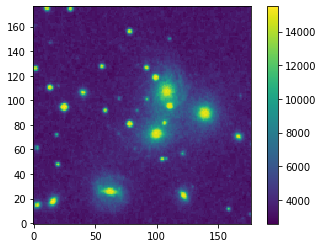

In [23]:
# imshow will map the 2D array (our data), and origin='lower' tells imshow to plot (0,0) in the bottom left corner. 
plt.imshow(image,origin='lower')
plt.colorbar()
plt.show()


# EXERCISE: What happens if you remove origin='lower'? How does the mapping of the image change?

We can now run some blob finding algorithms on this data set and see what we find and if it makes sense! For this, we will use the scikit-image package which is an image processing pacakge in Python. This package has three algorithms for detecting blobs (all discussed here: https://en.wikipedia.org/wiki/Blob_detection):
- Laplacian of Gaussian
- Difference of Gaussian
- Determinant of Hessian

This is great, but what does this actually mean? How do they work? What's the difference between them?

### Laplacian of Gaussian
This algorithm starts by smoothing (blurring) the entire image with a two-dimensional Gaussian function: 

$$\begin{align} g(x,y,\sigma) = \frac{1}{2\pi\sigma^2} e^\left(-\frac{x^2+y^2}{2\sigma^2}\right) \end{align}$$ 

where $(x,y)$ correspond to pixel coordinates on your image, and $\sigma$ represents the "size" or "width" of the Gaussian function. The algorithm then performs a mathematical computation called taking the "Laplacian", however we will not go into the details of that. What this effectively gives you is strong responses for blobs of size $\sqrt{2}\sigma$. This means that the algorithm is most sensitive to detecting blobs that have a similar size to that of the Gaussian function that you smooth your image with in the first place. In order to detect blobs of varying size, you need to use an approach that allows you to smooth your image with Gaussians of varying sizes to try to match the scale of potential blobs. This approach is the most accurate but also the slowest approach, especially for the largest blobs, because it needs to smooth the image with a larger Gaussian.

The scikit-image function "blob_log" (https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.blob_log) has this capability. To run it, we simply need to call the function and provide it with the correct input parameters. In the following piece of code, this is what we are going to provide the function with:
- **image** to run the blob detection on
- **min_sigma**: the minimum size for the Gaussian that will be used to smooth the image; this corresponds to the smallest blobs we expect in the image
- **max_sigma**: the maximum size for the Gaussian that will be used to smooth the image; this corresponds to the largest blobs we expect in the image
- **num_sigma**: the number of sizes to consider between the minimum and maximum
- **threshold**: relates to how faint of a blob you can detect; a smaller threshold will detect fainter blobs

The call to this function will output a list of x and y coordinates corresponding to the center of each blob, as well as the "size" of the Gaussian that it used to find that blob. Let's try it out!

In [24]:
# This line calls the blob detection (Laplacian of Gaussian function) on our galaxies image with the parameters that
# we provide
blobs_log = blob_log(image, min_sigma = 2, max_sigma=9, num_sigma=8, threshold=.05)

# Exercise 7: Blobs 
What kind of output does blobs_log provide? What are its dimensions? What does the length of blobs_log physically correspond to?

In [1]:
input("What kind of output is blobs_log?")
input("What are its dimension?")
input("What does the length of blobs_log physically correspond to?")

What kind of output is blobs_log?f
What are its dimension?140x140
What does the length of blobs_log physically correspond to?0


'0'

## Data from the blob finder 

The first column of blobs_log (blobs_log[0]) is the y-coordinate, the second column (blobs_log[1]) is the x-coordinate, and the third column (blobs_log[2]) is the "size" of the Gaussian that was used to detect the blob. 

In [26]:
# In this line we use the third column to calculate the radius of the blob itself.
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

## Plotting the blobs
Now we'll plot the blobs onto our image! For this, we will create circles with plt.Circle using the corrdinate and radius information we have from blobs_log. Then we will use add_patch to add that circle to our image. Since the plotting software needs information about the axes of the image in order to know where each circle goes, we use plt.gca() which means "Get Current Axis" and store the axis information into "ax". Then when we add the circle patches to the image, they will appear in the correct places. Finally, since there is more than one blob, we will create the circular patches and add them to the image one-by-one using a while loop. 

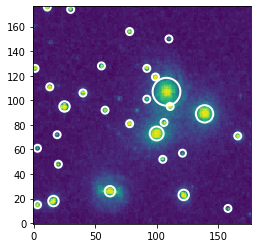

In [27]:
ax = plt.gca()
ax.imshow(image,origin='lower')
cnt = 0
while cnt < len(blobs_log):
    c = plt.Circle((blobs_log[cnt][1], blobs_log[cnt][0]), blobs_log[cnt][2], color='white', linewidth=2, fill=False)
    ax.add_patch(c)
    cnt = cnt + 1
plt.show()

#Exercise 8: Blob Parameters

Play around with the input parameters in the following block of code, then run it to see how changing they will affect the number (more blobs fewer blobs, no blobs) and type of blobs detected (bigger, smaller, brighter, fainter). 

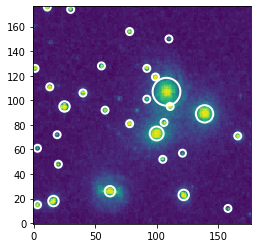

In [28]:
blobs_log = blob_log(image, min_sigma = 2, max_sigma=9, num_sigma=8, threshold=.05)

### Play with the paramters above this line ###
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
ax = plt.gca()
ax.imshow(image,origin='lower')
cnt = 0
while cnt < len(blobs_log):
    c = plt.Circle((blobs_log[cnt][1], blobs_log[cnt][0]), blobs_log[cnt][2], color='white', linewidth=2, fill=False)
    ax.add_patch(c)
    cnt = cnt + 1
plt.show()

Write down your findings below, such as what parameters give you no blobs, how does changing the parameters affect the results, and anything else that you find interesting!

In [29]:
# RECORD YOUR FINDINGS HERE

### Difference of Gaussian (DoG)
This algorithm is an approximation of the Laplacian of Gaussian, where rather than actually computing the "Laplacian" of the Gaussian that we mentioned above, DoG approximates this computation by taking the difference of two successively smoothed (blurred) images. Blobs are then detected as bright-on-dark spots in these difference images. This algorithm has the same disadvantage for larger blobs as the Laplacian of Gaussian algorithm.

To run this algorithm, we use the function "blob_dog" (https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.blob_dog), which takes the same parameters as blob_log, except for **num_sigma**, because the algorithm needs to take the difference between successive smoothings so it figures out the number of times it needs to smooth the image. This function returns the same type of array as "blob_log" : (y-coord, x-coord, size). 

#Exercise 9: DoG 

Fill in the input parameters for the call to the blob_dog function and run the code. How is the result from this function different from the previous one?

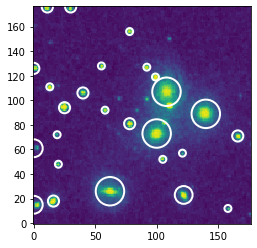

In [30]:
blobs_dog = blob_dog(image, min_sigma=2,max_sigma=9, threshold=0.05)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

ax = plt.gca()
ax.imshow(image,origin='lower')
cnt = 0
while cnt < len(blobs_dog):
    c = plt.Circle((blobs_dog[cnt][1], blobs_dog[cnt][0]), blobs_dog[cnt][2], color='white', linewidth=2, fill=False)
    ax.add_patch(c)
    cnt = cnt + 1
plt.show()

### Determinant of Hessian
The final option that scikit-image provides is the Determinant of Hessian algorithm. This algorithm performs a different kind of mathematical operation on the smoothed images, it calculates the Hessian matrix of the image (but we won't go into that), and searches for maxima in this matrix. It it the fastest approach, but it is also less accurate and has trouble finding very small blobs. 

To try it out, we will run the function "blob_doh" (https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.blob_doh), which takes as input the same parameters as the "blob_log" function. Let's try it out!

# Exercise 10: DoH
Fill in the input parameters for the call to the blob_doh function and run the code. How is the result from this function different from the previous one? How were the input parameters different from the previous algorithms?

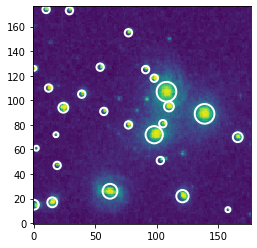

In [31]:
blobs_doh = blob_doh(image, min_sigma=2, max_sigma=9, num_sigma=8, threshold=.001)

ax = plt.gca()
ax.imshow(image,origin='lower')
cnt = 0
while cnt < len(blobs_doh):
    c = plt.Circle((blobs_doh[cnt][1], blobs_doh[cnt][0]), blobs_doh[cnt][2], color='white', linewidth=2, fill=False)
    ax.add_patch(c)
    cnt = cnt + 1
plt.show()

# Exercise 11: Blobs 2
How do the three algorithms compare to each other? Do their results agree with what you would intuitively call a blob? Do you trust one algorithm more than another? 


In [ ]:
# RECORD YOUR THOUGHTS HERE


---

># **Particle Tracking**

Now that we have learned several image processing techniques, we are ready to put them together in an application. In physics, there is an experiment called the Monopole Ion Trap that uses electric fields to trap particles as show below.

![alt text](https://imgur.com/1cBAcEc.gif)

The basic priciple is that the particle is attracted to and repeled by the rod at the top of the image. In the image above, we have a very stable, well behaved, trap in which the ion just goes back and forth between two locations. However, under certain curcumstances, the particle may start to behave erratically, as shown below.

![alt text](https://imgur.com/Z575ope.gif)

We would like to track the particle so that we can study its position and velocity.

Lets start by importing the two movies shown above into python. We have saved each movie, image by image, inside of folders on the computers. So we will import them as follows:

In [32]:
# we import the operating system library OS to help us import many files at once
import os

folder_location = "./P1"
#the following line will navigate python to the correct foler. chdir stands for change directory.
os.chdir(folder_location)
#the following line return a list of file names in the folder
files = os.listdir()



Now is a good time to notice that we don't actually need the entire image to do this computation. The only thing we really need is the region the particle travels within, as shown below 

![alt text](https://imgur.com/oXLY4RF.gif)

This is called the Region of Interest (ROI) of an image so we will crop every single image as we import it. Lets do that by importing a test image and checking how we want to crop it:

# Exercise 11: Cropping 2

Find the correct copping location by chaning the slice location

In [ ]:
test_image = io.imread(files[0])
plt.imshow(test_image[210::], cmap = cm.gray)


Now that we know where we want to crop the images, we can do so automatically for all of the images in the folder

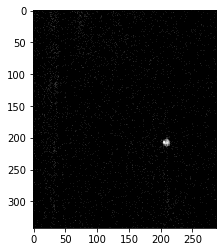

In [33]:
# the following line creates an empty list that we will populate with the images as we import and crop them. 
#That is, ROI is a list of matrices, each one representing an image.
ROIs = []

# the following for-loop imports the images
for image in files:
    ROIs.append(io.imread(image)[210::])

# to make sure we are doing things correctly, lets see what the 17th image in the list is
plt.imshow(ROIs[16], cmap=cm.gray)

Looks good. Okay, now that we have all of the images imported, we want to run a blob finding algorithm that finds the position of the blob in each of the images. However, there are "specles" in the background, so make sure that your blob finding parameters are set correctly.

# Exercise 12: Particle Tracking


The goal is for you to use the examples we have provided above to write your own code to systematically find the particles in the ROI list. A general outline of the code is provided below, but if you need further help feel free to ask. 

general outline:
1. choose one of the images in the ROI list to test your parameters on
2. apply one of the blob finding techniques to the image (take a look at earlier examples if needed)
3. make a for-loop that applies this technique to all of the images in ROI and collects all of the outputs needed

In [ ]:
#student solution goes here

In [81]:
#instructor solution

particles = []

for image in ROIs:
    blob = blob_log(image, min_sigma = 5, max_sigma=10, num_sigma=2, threshold=.1)
    particles.append(blob)
    
#print(particles)

We should now have a list of particle locations and sizes. Note that the size information is not important to this application, so we can get rid of it. In general, we find it easier to work with big complicated lists using numpy, so first we will convert the list into a numpy array, and then clean it up.

In [45]:
#the following line converts the list into a numpy array
particles = np.array(particles)
#the following line cleans up array to make it look nicer
particles = particles[::,0]
#this shows us what they array looks like.
print(particles)

[[123. 195.   5.]
 [136. 197.   5.]
 [150. 200.   5.]
 ...
 [217. 212.   5.]
 [210. 210.   5.]
 [200. 209.   5.]]


# Data Analysis

Great, using a ROI made this computation faster, and it made sure that the particle was easy to find. Unfortunately it also introduced a small offset error in the verticle position of the particle. This can be seen by taking a look at the picture below:

![alt text](https://imgur.com/aI3a3Ve.gif)

To correct for this error we simply have to add an offset to the y position of the particle list.

In [47]:
for n, blob in enumerate(particles):
    particles[n] = np.add(blob, [210,0,0])
print(particles)

[[333. 195.   5.]
 [346. 197.   5.]
 [360. 200.   5.]
 ...
 [427. 212.   5.]
 [420. 210.   5.]
 [410. 209.   5.]]


The final step is to turn these pixel locations into measurements of distance between the particle and the center of the rod. To do this, we will use the usual distance formula:

![alt text](https://i.imgur.com/xsRJGbR.png)

where (y_2, x_2) is the location of the center of the rod and (y_1, y_2) is the location of the particle. From previous measurements, the experimenters know that the center of the rod is approximately at 

y_2 = 83

x_2 = 137

so we can change all of the particle *location* data to particle *distance* data as follows:

In [80]:
distances = []
for particle in particles:
    distance = np.sqrt((83 - particle[0])**2 + (137-particle[1])**2)
    distances.append(distance)
    
distances = np.array(distances)
#print(distances)

Great, so now we have the the distances of the particles from the center of the rod for each movie. The experimenters also know two important pieces of information. 

1. the camera was taking 2360 pictures per second (FPS), so the time between each image is 1/2360 seconds. 
2. the distance between each pixel 5.9 micron = .0059 millimeters (mm)

we can use this information to make a plot of the particle's distance as a function of time with proper units.

Text(0, 0.5, 'distance(mm)')

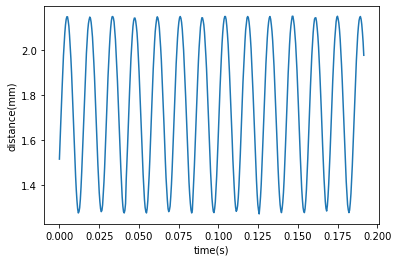

In [68]:
time = np.linspace(0,len(distances)/2360, len(distances) )
distances = distances*.0059
plt.plot(time,distances)
plt.xlabel('time(s)')
plt.ylabel('distance(mm)')

## Congratulations!

You just did particle tracking. Now we'll quickly demonstrate how to find the velocity of the particle.

Recall that the definition of velocity is simply distance/time. Since we know that the time between pictures is 1/2360 seconds, all we have to do is calculate the distance the particle moved between each frame.

In [76]:
velocities = []
for n in range(len(distances)):
    if n < (len(distances)-1):
        velocity = (distances[n+1] - distances[n])*2360
        velocities.append(velocity)
#print(velocities)

Sometime is it useful/interesting to see the velocity data in a "phase diagram", which is just a plot of the position vs the velocity:

Text(0, 0.5, 'velocity(mm/s)')

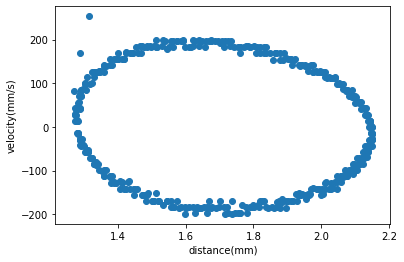

In [79]:
plt.scatter(distances[:-1:],velocities, )
plt.xlabel('distance(mm)')
plt.ylabel('velocity(mm/s)')

As you can see, the stable particle makes a circle in these "phase diagrams". As you can try (below), the unstable particle will produce sometehing that looks like scribles instead. Phase diagrams are often used to quickly check the stability of a particle, without having to watch the full movie.

# Challenge problem:

By repeating the steps above, can you reproduce these datasets for the case of the unstable particle? In the code below, we have imported all of the file names into "files_unstable" can you complete the code?

In [84]:
os.chdir('..')
folder_location = "./PC"
#the following line will navigate python to the correct foler. chdir stands for change directory.
os.chdir(folder_location)
#the following line return a list of file names in the folder
files_unstable = os.listdir()
#print(files_unstable)

# Bonus Material

In [ ]:
# to achieve a better resolution we need more points. 
# Let's use some lines 

number_of_points = 100
x_min,x_max = 5,9
y_min,y_max = 3,5

plt.vlines(x_min,y_min,y_max,color='r')
plt.vlines(x_max,y_min,y_max,color='b')
plt.hlines(y_min,x_min,x_max,color='g')
plt.hlines(y_max,x_min,x_max,color='k')

Perfect! 
But how do we fill the inside in a more effective way? We do not want to specify point by point or line by line.
Let's use a matrix! But let's start slow

In [ ]:
# number of points in each dimention 
# nx: dimention in x axis, ny: dimention in y axis
nx, ny = (2, 2)

x = np.linspace(0, 1, nx)
print('array x: ',x)
y = np.linspace(4, 5, ny)
print('array y: ',y)
xv, yv = np.meshgrid(x, y)
print('Can you describe what np.meshgrid does?')
# it gives a vector coordinate for each point in the x and y axis 
print(xv)
print(yv)


In [ ]:
# for dots and lines

# in this case each point represents a pixel!
plt.scatter(5,3,c='r')
plt.scatter(7,3,c='b')
plt.scatter(9,3,c='g')
plt.scatter(5,4,c='r')
plt.scatter(9,4,c='g')
plt.scatter(5,5,c='r')
plt.scatter(7,5,c='b')
plt.scatter(9,5,c='g')


In [ ]:
# we do not have to specify a color for each point.
# we can use an array that points to a specific color in a colormap

#cm for colormap
cm = plt.cm.get_cmap('RdYlBu')
xy = np.arange(20)
z = xy
print('color array:',z)
# the color is an array! that takes a color from cmap
sc = plt.scatter(xy, xy, c=z, vmin=0, vmax=20, s=35, cmap=cm)
plt.colorbar(sc)
plt.show()

In [ ]:
# let's crop some images and average/median them
images = [] 
l = 50
# Selecting some regions in the image
for i in range(5):
  images.append(insect[0+i*l:50+i*l,0+i*l:50+i*l])

images = np.asarray(images)
# we need to specify the 'axis' to let the function know which dimention to operate; do we want to operate the lines, the rows or the entire images? 
image_median = np.median(images,axis=0) 
image_average = np.average(images,axis=0)
for image in images:
  plt.figure()
  plt.imshow(image)
  plt.title('Image #%d'%i)
plt.figure()
plt.imshow(image_median)
plt.title('Median')
plt.figure()
plt.imshow(image_average)
plt.title('Averaged')

In [ ]:
insect[0:50,0:50]

# Contours

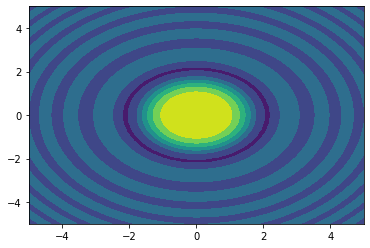

The information needed to construct an image is in z: [[-0.0052475  -0.01946367 -0.01626976 ... -0.01626976 -0.01946367
  -0.0052475 ]
 [-0.01946367 -0.01600796  0.00219041 ...  0.00219041 -0.01600796
  -0.01946367]
 [-0.01626976  0.00219041  0.01918309 ...  0.01918309  0.00219041
  -0.01626976]
 ...
 [-0.01626976  0.00219041  0.01918309 ...  0.01918309  0.00219041
  -0.01626976]
 [-0.01946367 -0.01600796  0.00219041 ...  0.00219041 -0.01600796
  -0.01946367]
 [-0.0052475  -0.01946367 -0.01626976 ... -0.01626976 -0.01946367
  -0.0052475 ]]


In [5]:
# There are functions that can fill the spaces for us!

number_of_points=100
# creating an array to achieve a better resolution
x = np.linspace(-5,5,number_of_points)
y = np.linspace(-5,5,number_of_points)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

h = plt.contourf(x,y,z)
plt.show()

print('The information needed to construct an image is in z:',z)

Basically, all the information of an image is contained in the 'z' array. Each row is a horizontal line and each value within these vectors is spatially linked to the vertical axis and its value is the color. 